## Chapter 2.1

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from gempy.assets.geophysics import GravityGrid

In [3]:
g = GravityGrid()

In [4]:
a,b,c = g.create_irregular_grid_kernel(resolution=[10,10,20], radio=100)

In [5]:
tz = g.set_tz(resolution=[10,10,20], radio=100)
tz.shape

(2541,)

In [6]:
a.shape, b.shape

((2541, 3), (2541, 3))

(-200, 0)

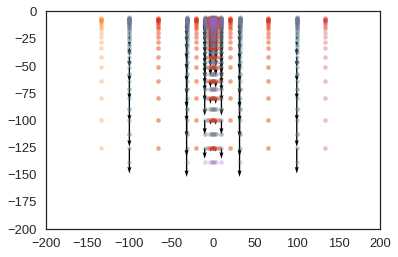

In [11]:
%matplotlib inline
plt.quiver(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
          a[:, 2].reshape(11,11,21)[:,5,:].ravel(),
         np.zeros(231),
         tz.reshape(11,11,21)[5, :, :].ravel()
         )

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() ,
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.', alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() - b[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.', alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel() - b[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.' , alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() + c[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.',  alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() ,
         a[:, 2].reshape(11,11,21)[:,5,:].ravel() + c[:, 2].reshape(11,11,21)[5,:,:].ravel(), '.', alpha=.3)

plt.xlim(-200, 200)
plt.ylim(-200, 0)

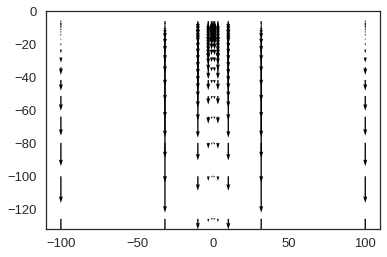

In [12]:
plt.quiver(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
          a[:, 2].reshape(11,11,21)[:,5,:].ravel(),
         np.zeros(231),
         tz.reshape(11,11,21)[5, :, :].ravel()
         )

Text(0.5, 0, 'Z Label')

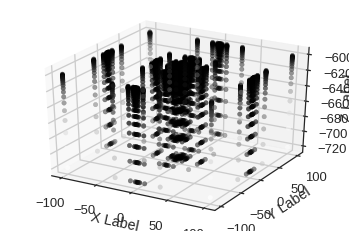

In [8]:
%matplotlib qt5
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a[:, 0], a[:,1], a[:, 2], c = tz)
# ax.scatter(a[:, 0] - b[:, 0],a[:, 1], a[:, 2], s=5)
# ax.scatter(a[:, 0], a[:, 1] - b[:, 1], a[:, 2], s=5)
# ax.scatter(a[:, 0] ,a[:, 1], a[:, 2] - b[:, 2], s=5)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [4]:
a, b= g.create_irregular_grid_convolution([10,10,20], 5)

In [5]:
t = np.geomspace(0.01, 1, 5)
np.pad(t, 1, 'reflect', reflect_type='odd')

array([-0.01162278,  0.01      ,  0.03162278,  0.1       ,  0.31622777,
        1.        ,  1.68377223])

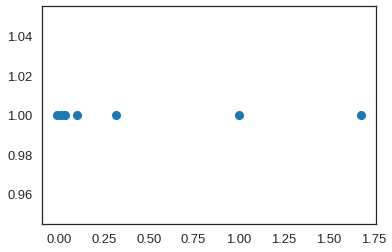

In [6]:
plt.plot(np.pad(t, 1, 'reflect', reflect_type='odd'), np.ones(7), 'o')

In [7]:
p = np.pad(t, 1, 'reflect', reflect_type='odd')
np.diff(p).shape, t.shape

((6,), (5,))

In [16]:
a.shape, b[0].shape

((2541, 3), (11,))

In [11]:
a.size

7623

In [18]:
np.gradient(a, axis=0)

array([[0.        , 0.        , 2.00257875],
       [0.        , 0.        , 1.60154658],
       [0.        , 0.        , 0.96010195],
       ...,
       [0.        , 0.        , 0.96010195],
       [0.        , 0.        , 1.60154658],
       [0.        , 0.        , 2.00257875]])

In [19]:
np.diff(a, axis=0).shape

(2540, 3)

In [14]:
np.kron?

In [2]:
import discretize

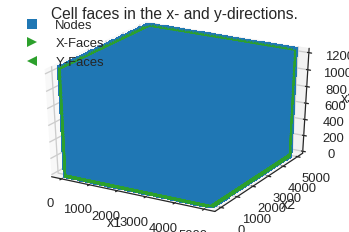

In [317]:
hx = np.ones(50) *100
hy = np.ones(50) *100
hz = np.arange(50)
tensor_mesh2 = discretize.TensorMesh([hx, hy, hz])
tensor_mesh2.plotGrid(faces=True, nodes=True, )
plt.title('Cell faces in the x- and y-directions.')
plt.legend(('Nodes', 'X-Faces', 'Y-Faces'))

In [572]:
grid = gp.Grid('regular_grid', extent=[0,100000,0,100000,-150000,0], resolution=[50,50,50])

In [282]:
gp.Grid??

In [144]:
tensor_mesh2.gridCC

array([[  50. ,   50. ,    0. ],
       [ 150. ,   50. ,    0. ],
       [ 250. ,   50. ,    0. ],
       ...,
       [4750. , 4950. , 1200.5],
       [4850. , 4950. , 1200.5],
       [4950. , 4950. , 1200.5]])

In [573]:
import theano
import theano.tensor as T
x_1 = T.dmatrix()
x_2 = T.dmatrix()

sqd = T.sqrt(T.maximum(
    (x_1 ** 2).sum(1).reshape((x_1.shape[0], 1)) +
    (x_2 ** 2).sum(1).reshape((1, x_2.shape[0])) -
    2 * x_1.dot(x_2.T), 0
))
eu = theano.function([x_1, x_2], sqd, allow_input_downcast=False)

In [574]:
device_loc = np.array([[50000,50000,100]])

In [13]:
np.geomspace(5, 10)

array([ 5.        ,  5.07123193,  5.14347867,  5.21675465,  5.29107456,
        5.36645326,  5.44290583,  5.52044757,  5.599094  ,  5.67886086,
        5.75976411,  5.84181994,  5.92504477,  6.00945525,  6.09506827,
        6.18190097,  6.26997073,  6.35929515,  6.44989213,  6.54177979,
        6.63497652,  6.72950096,  6.82537204,  6.92260893,  7.02123109,
        7.12125827,  7.22271047,  7.325608  ,  7.42997145,  7.53582169,
        7.64317993,  7.75206762,  7.86250658,  7.97451889,  8.08812697,
        8.20335356,  8.32022171,  8.43875481,  8.55897657,  8.68091107,
        8.80458268,  8.93001618,  9.05723664,  9.18626954,  9.31714069,
        9.44987628,  9.58450288,  9.72104741,  9.85953722, 10.        ])

In [17]:
np.gradient(np.geomspace(5, 10), edge_order=2)

array([0.07072454, 0.07173933, 0.07276136, 0.07379795, 0.0748493 ,
       0.07591563, 0.07699716, 0.07809409, 0.07920665, 0.08033505,
       0.08147954, 0.08264033, 0.08381765, 0.08501175, 0.08622286,
       0.08745123, 0.08869709, 0.0899607 , 0.09124232, 0.09254219,
       0.09386058, 0.09519776, 0.09655398, 0.09792953, 0.09932467,
       0.10073969, 0.10217486, 0.10363049, 0.10510685, 0.10660424,
       0.10812297, 0.10966333, 0.11122563, 0.1128102 , 0.11441733,
       0.11604737, 0.11770062, 0.11937743, 0.12107813, 0.12280306,
       0.12455256, 0.12632698, 0.12812668, 0.12995202, 0.13180337,
       0.13368109, 0.13558557, 0.13751717, 0.13947629, 0.14144927])

In [16]:
np.gradient?

In [576]:
grid_values = grid.values
dx, dy, dz = np.array(grid.get_dx_dy_dz())

s_gr_x = grid_values[:, 0] - device_loc[:, 0]
s_gr_y = grid_values[:, 1] - device_loc[:, 1]
s_gr_z = grid_values[:, 2] - device_loc[:, 2]

# getting the coordinates of the corners of the voxel...
x_cor = np.stack((s_gr_x - dx, s_gr_x + dx), axis=1)
y_cor = np.stack((s_gr_y - dy, s_gr_y + dy), axis=1)
z_cor = np.stack((s_gr_z - dz, s_gr_z + dz), axis=1)

 # ...and prepare them for a vectorial op
x_matrix = np.repeat(x_cor, 4, axis=1)
y_matrix = np.tile(np.repeat(y_cor, 2, axis=1), (1, 2))
z_matrix = np.tile(z_cor, (1, 4))


s_r = np.sqrt(x_matrix ** 2 + y_matrix ** 2 + z_matrix ** 2)

# This is the vector that determines the sign of the corner of the voxel
mu = np.array([1, -1, -1, 1, -1, 1, 1, -1])

tz = (
    np.sum(- 1 *
    #G *
    mu * (
    x_matrix * np.log(y_matrix + s_r) +
    y_matrix * np.log(x_matrix + s_r) -
    z_matrix * np.arctan(x_matrix * y_matrix / (z_matrix * s_r))),
    axis=1))

In [577]:
grid_values[:, 0].reshape(50,50,50)[crop:,25,:]

array([[ 1000.,  1000.,  1000., ...,  1000.,  1000.,  1000.],
       [ 3000.,  3000.,  3000., ...,  3000.,  3000.,  3000.],
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.],
       ...,
       [95000., 95000., 95000., ..., 95000., 95000., 95000.],
       [97000., 97000., 97000., ..., 97000., 97000., 97000.],
       [99000., 99000., 99000., ..., 99000., 99000., 99000.]])

In [578]:
 grid_values[:, 2].reshape(50,50,50)[crop:,25,:]

array([[-148500., -145500., -142500., ...,   -7500.,   -4500.,   -1500.],
       [-148500., -145500., -142500., ...,   -7500.,   -4500.,   -1500.],
       [-148500., -145500., -142500., ...,   -7500.,   -4500.,   -1500.],
       ...,
       [-148500., -145500., -142500., ...,   -7500.,   -4500.,   -1500.],
       [-148500., -145500., -142500., ...,   -7500.,   -4500.,   -1500.],
       [-148500., -145500., -142500., ...,   -7500.,   -4500.,   -1500.]])

In [579]:
tz.reshape(50,50,50)[crop:,25,].T.max()

4549.332967646284

In [563]:
tz.reshape(50,50,50)[crop:,25,].T

array([[0.36860128, 0.37293381, 0.37716609, ..., 0.37716609, 0.37293381,
        0.36860128],
       [0.38155334, 0.38620675, 0.39075574, ..., 0.39075574, 0.38620675,
        0.38155334],
       [0.39515185, 0.40015544, 0.40505046, ..., 0.40505046, 0.40015544,
        0.39515185],
       ...,
       [0.6610996 , 0.74608278, 0.84612306, ..., 0.84612306, 0.74608278,
        0.6610996 ],
       [0.43883788, 0.49631892, 0.56424329, ..., 0.56424329, 0.49631892,
        0.43883788],
       [0.20244441, 0.2292518 , 0.2610009 , ..., 0.2610009 , 0.2292518 ,
        0.20244441]])

In [564]:
a.sum(), b.sum()

(5284.650718932819, 4044.2776336663446)

In [565]:
a.mean(), np.median(a)

(2.1138602875731274, 0.6331010772532393)

In [566]:
(~c).sum() / 2500

0.2

(0, 1)

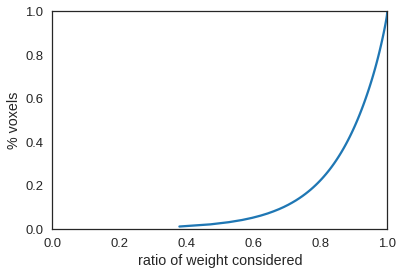

In [545]:
per_weight = []
per_voxels = []
for i in range(100):
    c = a< np.percentile(a, i)
    b = np.ma.masked_array(a, c)

    per_weight.append(b.sum()/a.sum())
    per_voxels.append((~c).sum() / 2500)
plt.plot(per_weight, per_voxels)
plt.ylabel('% voxels')
plt.xlabel('ratio of weight considered')
plt.xlim(0,1)
plt.ylim(0,1)

(0, 1)

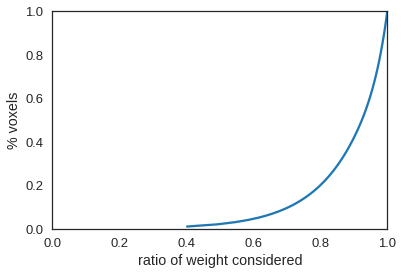

In [580]:
per_weight = []
per_voxels = []
for i in range(100):
    c = a< np.percentile(a, i)
    b = np.ma.masked_array(a, c)

    per_weight.append(b.sum()/a.sum())
    per_voxels.append((~c).sum() / 2500)
plt.plot(per_weight, per_voxels)
plt.ylabel('% voxels')
plt.xlabel('ratio of weight considered')
plt.xlim(0,1)
plt.ylim(0,1)

In [581]:
a = tz.reshape(50,50,50)[:,25,].T
c = a< np.percentile(a, 50)
b = np.ma.masked_array(a, c)
a.sum(), b.sum(), b.sum()/ a.sum(),  (~c).sum() / 2500

(114823.98284347064, 105918.00310648498, 0.922437982758999, 0.5)

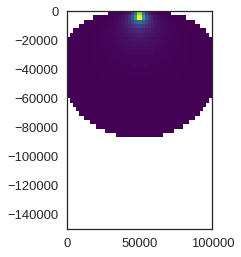

In [582]:
plt.imshow(b, origin='bottom', cmap='viridis', extent=grid.extent[[0,1,4,5]])

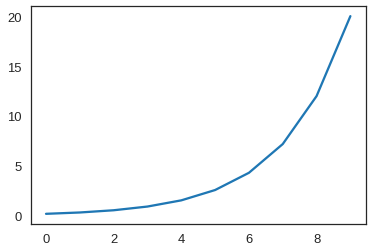

In [624]:
plt.plot(np.geomspace(.01,1, 10)*20)

In [622]:
np.geomspace(.01,1, 100)*20

array([ 0.2       ,  0.20952315,  0.21949975,  0.2299514 ,  0.24090071,
        0.25237138,  0.26438823,  0.27697727,  0.29016576,  0.30398222,
        0.31845656,  0.33362011,  0.34950568,  0.36614766,  0.38358205,
        0.4018466 ,  0.42098083,  0.44102615,  0.46202594,  0.48402565,
        0.5070729 ,  0.53121756,  0.55651188,  0.58301061,  0.6107711 ,
        0.63985343,  0.67032053,  0.70223835,  0.73567595,  0.77070572,
        0.80740345,  0.84584857,  0.88612429,  0.92831777,  0.97252032,
        1.0188276 ,  1.06733985,  1.11816204,  1.17140416,  1.22718145,
        1.28561462,  1.34683013,  1.41096046,  1.47814441,  1.54852737,
        1.62226166,  1.69950687,  1.78043017,  1.86520669,  1.95401991,
        2.04706204,  2.14453444,  2.24664807,  2.3536239 ,  2.46569348,
        2.58309933,  2.70609555,  2.83494833,  2.96993652,  3.11135229,
        3.25950167,  3.41470529,  3.57729906,  3.74763485,  3.9260813 ,
        4.11302462,  4.30886938,  4.51403944,  4.72897883,  4.95

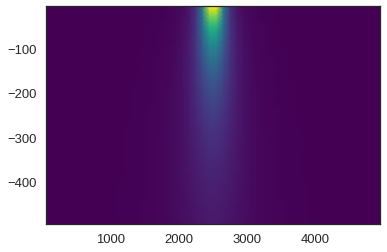

In [374]:
crop=0
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.pcolormesh(grid_values[:, 0].reshape(50,50,50)[crop:,25,:],
              grid_values[:, 2].reshape(50,50,50)[crop:,25,:],
              tz.reshape(50,50,50)[crop:,25,][::-1], shading='gouraud',
              cmap='viridis')

# Using simpeg grid

In [318]:
eu(tensor_mesh2.gridCC, device_loc)

array([[3464.82322781],
       [3394.84903935],
       [3326.4094757 ],
       ...,
       [3536.41064499],
       [3600.86104286],
       [3666.90608688]])

In [319]:
s_gr_x = tensor_mesh2.gridCC[:, 0] - device_loc[:, 0]
s_gr_y = tensor_mesh2.gridCC[:, 1] - device_loc[:, 1]
s_gr_z = tensor_mesh2.gridCC[:, 2] - device_loc[:, 2]

In [320]:
tensor_mesh2.gridCC[:, 0]

array([  50.,  150.,  250., ..., 4750., 4850., 4950.])

In [321]:
tensor_mesh2.h_gridded[:, 0]

array([100., 100., 100., ..., 100., 100., 100.])

In [322]:
# getting the coordinates of the corners of the voxel...
x_cor = np.stack((s_gr_x - tensor_mesh2.h_gridded[:, 0], s_gr_x + tensor_mesh2.h_gridded[:, 0]), axis=1)
y_cor = np.stack((s_gr_y - tensor_mesh2.h_gridded[:, 1], s_gr_y + tensor_mesh2.h_gridded[:, 1]), axis=1)
z_cor = np.stack((s_gr_z - tensor_mesh2.h_gridded[:, 2], s_gr_z + tensor_mesh2.h_gridded[:, 2]), axis=1)

In [323]:
 # ...and prepare them for a vectorial op
x_matrix = np.repeat(x_cor, 4, axis=1)
y_matrix = np.tile(np.repeat(y_cor, 2, axis=1), (1, 2))
z_matrix = np.tile(z_cor, (1, 4))


In [324]:
s_r = np.sqrt(x_matrix ** 2 + y_matrix ** 2 + z_matrix ** 2)

In [325]:
s_r.shape

(125000, 8)

In [326]:
# This is the vector that determines the sign of the corner of the voxel
mu = np.array([1, -1, -1, 1, -1, 1, 1, -1])

In [327]:
tze = (
    np.sum(- 1 *
    #G *
    mu * (
    x_matrix * np.log(y_matrix + s_r) +
    y_matrix * np.log(x_matrix + s_r) -
    z_matrix * np.arctan(x_matrix * y_matrix / (z_matrix * s_r))),
    axis=1))

In [328]:
tz.shape

(125000,)

In [80]:
- tz.reshape(50,50,50)[20:,25,:].min(), -tz.reshape(50,50,50)[20:,25,:].max()

(0.00404022309352392, 0.0002722783608817281)

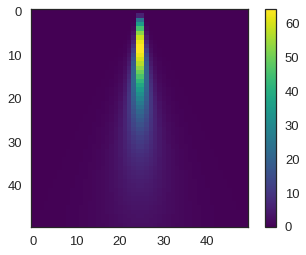

In [330]:
from matplotlib.colors import LogNorm

plt.imshow(-tze.reshape(50,50,50)[0:,25,:], cmap='viridis')
          # norm=LogNorm(vmin=0.0002722783608817281, vmax=0.00404022309352392))
plt.colorbar()

In [346]:
tze.reshape(50,50,50)[23:27,25,:]


array([[ -0.03257796,  -0.03686609,  -0.04193835,  -0.04798176,
         -0.05523929,  -0.06403029,  -0.07477988,  -0.0880619 ,
         -0.10466285,  -0.12567905,  -0.1526674 ,  -0.18788511,
         -0.23468118,  -0.29815445,  -0.38629603,  -0.51204332,
         -0.69711473,  -0.97945263,  -1.42819988,  -2.17452394,
         -3.47365528,  -5.80867741,  -9.91762962, -16.01660676,
        -21.44047516, -21.44047516, -16.01660676,  -9.91762962,
         -5.80867741,  -3.47365528,  -2.17452394,  -1.42819988,
         -0.97945263,  -0.69711473,  -0.51204332,  -0.38629603,
         -0.29815445,  -0.23468118,  -0.18788511,  -0.1526674 ,
         -0.12567905,  -0.10466285,  -0.0880619 ,  -0.07477988,
         -0.06403029,  -0.05523929,  -0.04798176,  -0.04193835,
         -0.03686609,  -0.03257796],
       [ -0.03689544,  -0.04174027,  -0.04746819,  -0.05428896,
         -0.06247473,  -0.07238275,  -0.0844878 ,  -0.09942954,
         -0.11808284,  -0.14166397,  -0.17189489,  -0.2112628 ,
   

In [159]:
tensor_mesh2.gridCC

array([[  50. ,   50. ,    0. ],
       [ 150. ,   50. ,    0. ],
       [ 250. ,   50. ,    0. ],
       ...,
       [4750. , 4950. , 1200.5],
       [4850. , 4950. , 1200.5],
       [4950. , 4950. , 1200.5]])

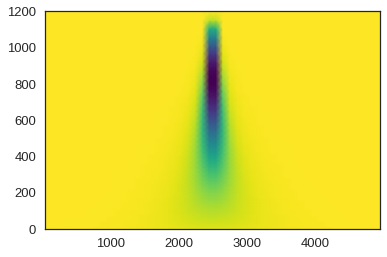

In [331]:
crop=0
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.pcolormesh(tensor_mesh2.gridCC[:, 0].reshape(50,50,50)[crop:,25,:],
              tensor_mesh2.gridCC[:, 2].reshape(50,50,50)[crop:,25,:],
              tze.reshape(50,50,50)[crop:,25,][::-1], shading='gouraud',
              cmap='viridis')

In [194]:
tensor_mesh2.gridCC[:, 0].reshape(50,50,50)[crop:,25,:],


(array([[  50.,  150.,  250., ..., 4750., 4850., 4950.],
        [  50.,  150.,  250., ..., 4750., 4850., 4950.],
        [  50.,  150.,  250., ..., 4750., 4850., 4950.],
        ...,
        [  50.,  150.,  250., ..., 4750., 4850., 4950.],
        [  50.,  150.,  250., ..., 4750., 4850., 4950.],
        [  50.,  150.,  250., ..., 4750., 4850., 4950.]]),)

In [202]:
tensor_mesh2.gridCC[:, 2].reshape(50,50,50)[:,25,0]

array([0.0000e+00, 5.0000e-01, 2.0000e+00, 4.5000e+00, 8.0000e+00,
       1.2500e+01, 1.8000e+01, 2.4500e+01, 3.2000e+01, 4.0500e+01,
       5.0000e+01, 6.0500e+01, 7.2000e+01, 8.4500e+01, 9.8000e+01,
       1.1250e+02, 1.2800e+02, 1.4450e+02, 1.6200e+02, 1.8050e+02,
       2.0000e+02, 2.2050e+02, 2.4200e+02, 2.6450e+02, 2.8800e+02,
       3.1250e+02, 3.3800e+02, 3.6450e+02, 3.9200e+02, 4.2050e+02,
       4.5000e+02, 4.8050e+02, 5.1200e+02, 5.4450e+02, 5.7800e+02,
       6.1250e+02, 6.4800e+02, 6.8450e+02, 7.2200e+02, 7.6050e+02,
       8.0000e+02, 8.4050e+02, 8.8200e+02, 9.2450e+02, 9.6800e+02,
       1.0125e+03, 1.0580e+03, 1.1045e+03, 1.1520e+03, 1.2005e+03])

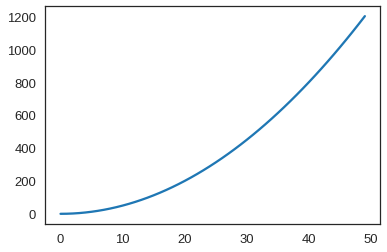

In [201]:
plt.plot(tensor_mesh2.gridCC[:, 2].reshape(50,50,50)[:,25,0])

In [223]:
 tensor_mesh2.gridCC[:, 2].reshape(50,50,50)[crop:,25,:][::-1, :]

array([[1.2005e+03, 1.2005e+03, 1.2005e+03, ..., 1.2005e+03, 1.2005e+03,
        1.2005e+03],
       [1.1520e+03, 1.1520e+03, 1.1520e+03, ..., 1.1520e+03, 1.1520e+03,
        1.1520e+03],
       [1.1045e+03, 1.1045e+03, 1.1045e+03, ..., 1.1045e+03, 1.1045e+03,
        1.1045e+03],
       ...,
       [2.0000e+00, 2.0000e+00, 2.0000e+00, ..., 2.0000e+00, 2.0000e+00,
        2.0000e+00],
       [5.0000e-01, 5.0000e-01, 5.0000e-01, ..., 5.0000e-01, 5.0000e-01,
        5.0000e-01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [279]:
(tensor_mesh2.vol* tz).reshape(50,50,50).T[23:27,25, :]

array([[ 0.00000000e+00, -2.11896523e+02, -3.38535649e+03,
        -1.70595992e+04, -5.33348206e+04, -1.27493464e+05,
        -2.55103369e+05, -4.47702673e+05, -7.08438669e+05,
        -1.02985203e+06, -1.39515988e+06, -1.78230184e+06,
        -2.16860171e+06, -2.53423911e+06, -2.86398479e+06,
        -3.14757365e+06, -3.37931280e+06, -3.55736303e+06,
        -3.68292644e+06, -3.75944621e+06, -3.79186897e+06,
        -3.78599979e+06, -3.74796895e+06, -3.68381955e+06,
        -3.59921412e+06, -3.49924901e+06, -3.38835914e+06,
        -3.27029220e+06, -3.14813230e+06, -3.02435462e+06,
        -2.90089684e+06, -2.77923655e+06, -2.66046730e+06,
        -2.54536886e+06, -2.43446956e+06, -2.32809967e+06,
        -2.22643615e+06, -2.12953932e+06, -2.03738249e+06,
        -1.94987555e+06, -1.86688343e+06, -1.78824059e+06,
        -1.71376199e+06, -1.64325150e+06, -1.57650818e+06,
        -1.51333090e+06, -1.45352168e+06, -1.39688804e+06,
        -1.34324462e+06, -1.29241417e+06],
       [ 0.00

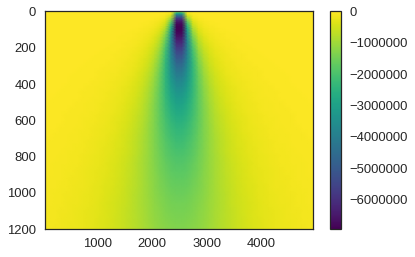

In [273]:
crop=0
fig, axs = plt.subplots(nrows=1, ncols=1)
a = axs.pcolormesh(tensor_mesh2.gridCC[:, 0].reshape(50,50,50)[crop:,25,:],
              tensor_mesh2.gridCC[:, 2].reshape(50,50,50)[crop:,25,:],
              (tensor_mesh2.vol* tz).reshape(50,50,50)[crop:,25, :], shading='gouraud',
              cmap='viridis', edgecolors='face')
plt.ylim(1200,0)
plt.colorbar(a)

(50, 0)

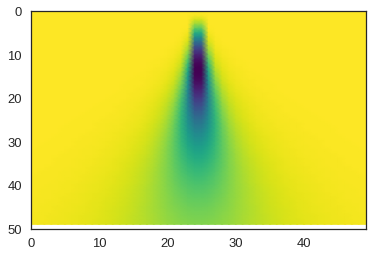

In [259]:
crop=0
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.pcolormesh(
              (tensor_mesh2.vol* tz).reshape(50,50,50)[crop:,25, :], shading='gouraud',
              cmap='viridis', edgecolors='face')
plt.ylim(50,0)

(1200, 0)

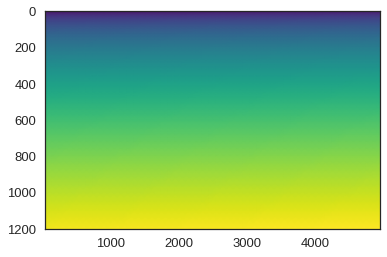

In [235]:
crop=0
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.pcolormesh(tensor_mesh2.gridCC[:, 0].reshape(50,50,50)[crop:,25,:],
              tensor_mesh2.gridCC[:, 2].reshape(50,50,50)[crop:,25,:],
              np.arange(2500).reshape(50,50), shading='gouraud',
              cmap='viridis', edgecolors='face')
plt.ylim(1200,0)

In [8]:
import numpy as np
a = np.ones(100000000, dtype=float)
a.nbytes

800000000

In [1]:
axs.pcolormesh?

Object `axs.pcolormesh` not found.


TypeError: object of type 'int' has no len()

In [242]:
tensor_mesh2.vectorNx

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
       3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
       4500., 4600., 4700., 4800., 4900., 5000.])

(1200, 0)

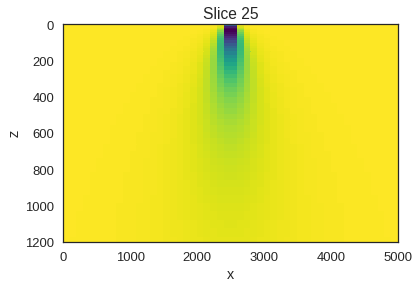

In [260]:
tensor_mesh2.plotSlice(tz, grid=False, normal='Y', pcolorOpts = {"cmap":"viridis"})
plt.ylim(1200,0)

In [241]:
tz.reshape(50,50,50)[24:26,25, :]

array([[ -0.03689544,  -0.04174027,  -0.04746819,  -0.05428896,
         -0.06247473,  -0.07238275,  -0.0844878 ,  -0.09942954,
         -0.11808284,  -0.14166397,  -0.17189489,  -0.2112628 ,
         -0.2634411 ,  -0.33399097,  -0.43156593,  -0.57004747,
         -0.77245847,  -1.07836763,  -1.55825596,  -2.34148825,
         -3.66750061,  -5.95420738,  -9.74790134, -14.9967255 ,
        -19.41101404, -19.41101404, -14.9967255 ,  -9.74790134,
         -5.95420738,  -3.66750061,  -2.34148825,  -1.55825596,
         -1.07836763,  -0.77245847,  -0.57004747,  -0.43156593,
         -0.33399097,  -0.2634411 ,  -0.2112628 ,  -0.17189489,
         -0.14166397,  -0.11808284,  -0.09942954,  -0.0844878 ,
         -0.07238275,  -0.06247473,  -0.05428896,  -0.04746819,
         -0.04174027,  -0.03689544],
       [ -0.04155039,  -0.04699176,  -0.05342137,  -0.06107283,
         -0.07024889,  -0.08134627,  -0.09489127,  -0.11159154,
         -0.13241245,  -0.15869228,  -0.19231911,  -0.23600872,
   

In [173]:
gp.save_model(geo_model, 'Tutorial2-1')

Directory already exists, files will be overwritten


True

In [3]:
if False:
    geo_model = gp.load_model('Tutorial2-1')
else:
    geo_model = gp.create_model('Tutorial2-1')
    gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
    geo_model.set_default_surfaces()
#     geo_model.set_default_orientation()
#     geo_model.add_surface_points(400, 300, -500, 'surface1')
#     geo_model.add_surface_points(600, 300, -500, 'surface1')


In [4]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile',  verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [5]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            0
          number series                              1
          number surfaces per series                []
          len surfaces surface_points               []
          len series surface_points                [0]
          len series orientations                   []
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                1732.05
          $C_o$                                71428.6
          drift equations                          [0]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                         NaN
          centers                      [nan, nan, nan]

In [6]:
vtk_object = gp.plot.plot_3D(geo_model)

holding... Use vtk.resume to go back to the interactive window


In [7]:
vtk_object.set_real_time_on()

In [ ]:
geo_model.additional_data

In [18]:
geo_model.modify_kriging_parameters('range', 50)

In [19]:
geo_model.interpolator.theano_graph.a_T.get_value()

array(0.125)

In [160]:
vtk_object.update_model()

In [159]:
vtk_object.resume()

holding... Use vtk.resume to go back to the interactive window


In [9]:
gp.activate_interactive_df(geo_model, vtk_object)

['surface1'] 1
Model not computed. Laking data in some surface
Model not computed. Laking data in some surface


In [101]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
['surface1'] 1
['surface1'] 1
3
2
2
2
2
1
1
3


In [130]:
geo_model.qi.get('orientations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

0
0
0
0
0


In [171]:
geo_model.modify_kriging_parameters('range', 5000)
geo_model.modify_kriging_parameters('drift equations', np.array([0]))
geo_model.interpolator.set_initial_results()
geo_model.rescaling.set_rescaled_orientations()
vtk_object.update_model()

In [118]:
geo_model.interpolator.theano_graph.a_T.get_value()

array(1.25)

In [119]:
geo_model.interpolator.theano_graph.c_o_T.get_value()

array(89.28571429)

In [144]:
gp.compute_model(geo_model, debug=False,compute_mesh=True, sort_surfaces=False)



Lithology ids 
  [1.5 1.5 1.5 ... 1.5 1.5 1.5] 

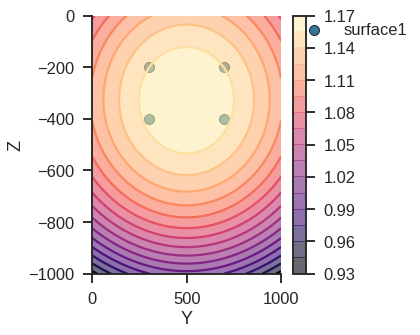

In [172]:
gp.plot.plot_scalar_field(geo_model, 25, direction='x', series=0)
plt.colorbar()

In [42]:
geo_model.additional_data.kriging_data

,values
range,1e-06
$C_o$,71428.6
drift equations,[3]
nugget grad,0.01
nugget scalar,1e-06


../../gempy/plot/visualization_2d.py:287: FutureWarning: Passing the block directly will get deprecated in the next version. Please use Solutionand block_type instead
  'and block_type instead', FutureWarning)


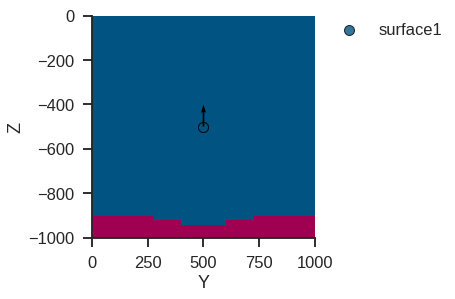

In [56]:
gp.plot.plot_section(geo_model, cell_number=25, block_type=geo_model.solutions.lith_block,
                         direction='x', plot_data=True)
